In [1]:
import numpy as np
import os
from keras.layers.convolutional import Conv3D, MaxPooling3D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Activation, ZeroPadding3D, TimeDistributed, LSTM, GRU, Reshape
from keras.utils import plot_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gc
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.preprocessing import LabelEncoder
import sklearn
import seaborn as sns
import tensorflow as tf
from keras import regularizers
from prettytable import PrettyTable

In [2]:
'''dir_path = "C:/Users/HP/Desktop/cnn/Computer-Vision-Lip-Reading-2.0-main/collected_data/"

# Set the dimensions of each frame
height, width, channels = 80, 112, 3

# Initialize arrays to store the video frames and their corresponding labels
videos = []
labels = []
counter = 0
# Loop through each text file and extract the video frames
for root, dirs, files in os.walk(dir_path):
    

    for file in files:
        if file == "data.txt":

            # Extract the label from the directory name
            label = root.split("/")[-1]
            label = label.split("_")[0]
            #if label not in wanted_words:
            #    continue
            counter += 1
            print(counter, end=" ")
            

            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Evaluate the contents of the text file as a Python expression
            data_list = eval(data_str)
            
            # Convert the list to a numpy array
            data_array = np.array(data_list)
            #print(data_array.shape)

            # Reshape the data into a 4D array of shape (num_frames, height, width, channels)
            num_frames = len(data_list)
            frames = data_array.reshape((num_frames, height, width, channels))
            # Append the frames and label to the videos and labels arrays
            videos.append(frames)
            labels.append(label)
print(labels)

# Convert the videos and labels arrays to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

# Save the videos and labels as separate .npy files
np.save("videosCorrect.npy", videos)
np.save("labelsCorrect.npy", labels)


'''

'dir_path = "C:/Users/HP/Desktop/cnn/Computer-Vision-Lip-Reading-2.0-main/collected_data/"\n\n# Set the dimensions of each frame\nheight, width, channels = 80, 112, 3\n\n# Initialize arrays to store the video frames and their corresponding labels\nvideos = []\nlabels = []\ncounter = 0\n# Loop through each text file and extract the video frames\nfor root, dirs, files in os.walk(dir_path):\n    \n\n    for file in files:\n        if file == "data.txt":\n\n            # Extract the label from the directory name\n            label = root.split("/")[-1]\n            label = label.split("_")[0]\n            #if label not in wanted_words:\n            #    continue\n            counter += 1\n            print(counter, end=" ")\n            \n\n            with open(os.path.join(root, file), \'r\') as f:\n                data_str = f.read()\n\n            # Evaluate the contents of the text file as a Python expression\n            data_list = eval(data_str)\n            \n            # Convert

In [3]:
'''
# Set the directory path where the text files are located
dir_path = "C:/Users/HP/Desktop/cnn/Computer-Vision-Lip-Reading-2.0-main/collected_data/"
# Set the dimensions of each frame
height, width, channels = 80, 112, 3

# Initialize arrays to store the video frames and their corresponding labels
videos = []
labels = []
counter = 0
# Loop through each text file and extract the video frames
for root, dirs, files in os.walk(dir_path):
    

    for file in files:
        if file == "data.txt":

            # Extract the label from the directory name
            label = root.split("/")[-1]
            label = label.split("_")[0]
            #if label not in wanted_words:
            #    continue
            counter += 1
            print(counter, end=" ")
            

            with open(os.path.join(root, file), 'r') as f:
                data_str = f.read()

            # Evaluate the contents of the text file as a Python expression
            data_list = eval(data_str)
            
            # Convert the list to a numpy array
            data_array = np.array(data_list)
            #print(data_array.shape)

            # Reshape the data into a 4D array of shape (num_frames, height, width, channels)
            num_frames = len(data_list)
            frames = data_array.reshape((num_frames, height, width, channels))
            # Append the frames and label to the videos and labels arrays
            videos.append(frames)
            labels.append(label)
print(labels)

# Convert the videos and labels arrays to NumPy arrays
videos = np.array(videos)
labels = np.array(labels)

# Save the videos and labels as separate .npy files
np.save("videosCorrect.npy", videos)
np.save("labelsCorrect.npy", labels)
'''
 #http://kaggle/input/best-lip-reading-dataset/outputs



#videos = np.load('/kaggle/input/better-lip-reading/videosCorrect.npy')
#labels = np.load('/kaggle/input/better-lip-reading/labelsCorrect.npy')

file_path1 = "C:/Users/HP/Desktop/cnn/Computer-Vision-Lip-Reading-2.0-main/training/videosCorrect.npy"

# Load the numpy arrays using the file_path
videos = np.load(file_path1)

file_path2 = "C:/Users/HP/Desktop/cnn/Computer-Vision-Lip-Reading-2.0-main/training/labelsCorrect.npy"

# Load the numpy arrays using the file_path
labels = np.load(file_path2)

#videos = np.load('videosCorrect.npy')
#labels = np.load('labelsCorrect.npy')
print("Done")


Done


In [4]:
# Print the shape of the videos and labels arrays
print("Videos shape:", videos.shape)
print("Labels shape:", labels.shape)

Videos shape: (678, 22, 80, 112, 3)
Labels shape: (678,)


In [5]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
labels = encoded_labels




In [6]:
a 21
bye 52
can 51
cat 50
demo 73
dog 50
hello 51
here 61
is 54
lips 53
my 53  10
ok 4  11
read 54   12
test 2     13
you 51       14

SyntaxError: invalid syntax (1042474030.py, line 1)

In [7]:
label_dict = {6: 'hello', 5: 'dog', 10: 'my', 12: 'read', 9: 'lips', 3: 'cat', 11: 'ok',14:'you' , 0: 'a', 4: 'demo', 7: 'here', 8: 'is', 1: 'bye', 2: 'can', 13: 'test'}

In [8]:
# Split the data into training and validation sets

X_train, X_test, y_train, y_test = train_test_split(videos, labels, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

del videos

Training set shape: (542, 22, 80, 112, 3) (542,)
Test set shape: (136, 22, 80, 112, 3) (136,)


In [ ]:
gc.collect()
!cat /proc/meminfo | grep Mem

In [9]:
'''# Get the unique classes
classes = np.unique(labels)

# Initialize an empty dictionary to store the counts for each class
class_counts = {}

# Count the number of occurrences of each class
counts = np.bincount(labels)

# Populate the class_counts dictionary with the class names and their corresponding counts
for encoded_label, class_name in label_dict.items():
    class_counts[class_name] = counts[encoded_labels]

# Print the distribution of classes
for class_name, count in class_counts.items():
    print("{}  {} counts".format(class_name.ljust(max_len), count))'''



'# Get the unique classes\nclasses = np.unique(labels)\n\n# Initialize an empty dictionary to store the counts for each class\nclass_counts = {}\n\n# Count the number of occurrences of each class\ncounts = np.bincount(labels)\n\n# Populate the class_counts dictionary with the class names and their corresponding counts\nfor encoded_label, class_name in label_dict.items():\n    class_counts[class_name] = counts[encoded_labels]\n\n# Print the distribution of classes\nfor class_name, count in class_counts.items():\n    print("{}  {} counts".format(class_name.ljust(max_len), count))'

In [10]:
# Get the unique classes
classes = np.unique(labels)

# Count the number of occurrences of each class
counts = np.bincount(labels, minlength=len(classes))

# Find the maximum length of the class names for alignment
max_len = max([len(label_dict[i]) for i in range(len(label_dict))])

# Print the distribution of classes
for i, count in enumerate(counts):
    class_name = label_dict[i].ljust(max_len)
    print("{}  {} counts".format(class_name, count))

a      21 counts
bye    52 counts
can    51 counts
cat    50 counts
demo   73 counts
dog    50 counts
hello  49 counts
here   61 counts
is     54 counts
lips   53 counts
my     53 counts
ok     4 counts
read   54 counts
test   2 counts
you    51 counts


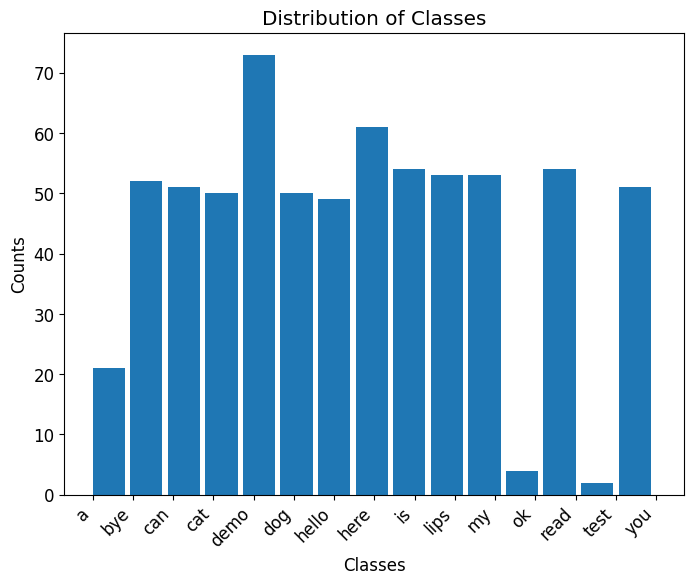

In [11]:


# Set the figure size and font size
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})

# Plot the histogram
plt.hist(labels, bins=len(classes), width=0.8)
plt.xticks(range(len(classes)), [label_dict[i] for i in range(len(classes))], rotation=45, ha='right')
plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Distribution of Classes')

# Display the plot
plt.show()

In [12]:
print(y_train)

[ 8  5  4  0  4 10  4  1  3  7  1  5  3 12  6  9  4  7  6 14  6 14  7  4
 14  4 14  5 12 14  6 12  7  2  2 12  4  5 14  0  2 10  7  9  7 10  4  3
 10  1  1  2  3  9 12  1  0  9 10  8  5  6  8 10  9  4  8  8  2  8  6  8
  2  1  0 12 10  5  5  7 14  3 12  1  4  9  0  1  5  4 12 14  6  2  6  7
  9  5  4  4  6  2  7 12 10 12  1  4 11  5  4  5  3  2 14 10  2 14  1 12
  7  4  4  2 12  2 14 10  4  0 14  9  8  6  2  4  5  6  8  3  7  7 12 12
  5  9  1  5  4 14 14  2  8 14 10  2  6 12  6  4  6  3  3 10 12  4  8  7
 14  6 13  3  3 10  0  3 10  6  0  6  1 10  3 10 10  4  6  8  5  3  3  8
  5  2 11  3 14  1  8  4  5  0  7  6  5 10 14  4  8 12  7  2  4  6 12  9
  8  8  8  0  1  7  9  9  0  1 14 12  0 12  7  6 12  5  9  5  9  4  1 10
  5  1  7  4  1  3  4 14  7  7  4 12  8  4 12 12  7  8 14 12  1  9  3  8
  3  6  4 12  7  7 12 10  3  8  9  4  8 10  2 10  2  2  8 14  2  9  3  7
 14  4 14  9  8 10  0  9  1  3  5  6  9  9  7  1  2  9  9  9  5 11  6  8
  3  8  8  5 12  7 14  1  3  8  8  6  4  7  9  3  8

In [13]:
print(y_test)

[14  6  1  7  2  6  5  3 12  7  6  7 10 12  3 14  4  1  4  8  4  2  6  7
 14  1  2  5  7 10  8  9 14  2 14 14  9  2 14  8  2 14  0 10  3  9  5 14
  1  4  4  7 14 10 12  7  2  3  7  0  4  2 12  6  5  6 10 10 12  5  1  9
  5  5  1  9  1  1  5  4  1  1  6  6 10  3  7  6 14  2  1  8  1  9  5  1
 14  7  0  3 14 10  3  8  8  3  4  2  5  5  4 14  7  4  1  8  2  6  1  4
  8  5 12 12 14  3  1  6  3  4  9  2  2  1 12 10]


In [14]:
input_shape = (22, 80, 112, 3)

model = Sequential()
model.add(Conv3D(8, (3, 3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(32, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(MaxPooling3D((2, 2, 2)))
model.add(Conv3D(256, (3, 3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convert the target labels to one-hot encoding
#y_train_onehot = tf.keras.utils.to_categorical(y_train)
#y_test_onehot = tf.keras.utils.to_categorical(y_test)


num_classes = 15  # Number of unique classes
y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 20, 78, 110, 8)    656       
                                                                 
 max_pooling3d (MaxPooling3D  (None, 10, 39, 55, 8)    0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 8, 37, 53, 32)     6944      
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 4, 18, 26, 32)    0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 2, 16, 24, 256)    221440    
                                                                 
 flatten (Flatten)           (None, 196608)            0

In [15]:
#To DO 

In [16]:
# Train the model and record the history of training
history = model.fit(X_train, y_train_onehot, epochs=10, batch_size=16, validation_data=(X_test, y_test_onehot))

Epoch 1/10
34/34 [==============================] - 4033s 120s/step - loss: 24.2450 - accuracy: 0.1531 - val_loss: 1.9696 - val_accuracy: 0.6838
Epoch 2/10
34/34 [==============================] - 3935s 117s/step - loss: 1.8180 - accuracy: 0.4336 - val_loss: 0.6368 - val_accuracy: 0.8824
Epoch 3/10
34/34 [==============================] - 5167s 152s/step - loss: 1.2695 - accuracy: 0.6661 - val_loss: 0.5032 - val_accuracy: 0.9412
Epoch 4/10
34/34 [==============================] - 4714s 140s/step - loss: 0.9577 - accuracy: 0.7159 - val_loss: 0.2142 - val_accuracy: 0.9779
Epoch 5/10
34/34 [==============================] - 4101s 122s/step - loss: 0.6660 - accuracy: 0.8284 - val_loss: 0.2347 - val_accuracy: 0.9779
Epoch 6/10
34/34 [==============================] - 4284s 128s/step - loss: 0.5254 - accuracy: 0.8524 - val_loss: 0.1594 - val_accuracy: 0.9706
Epoch 7/10
34/34 [==============================] - 4166s 123s/step - loss: 0.4585 - accuracy: 0.8838 - val_loss: 0.1452 - val_accuracy

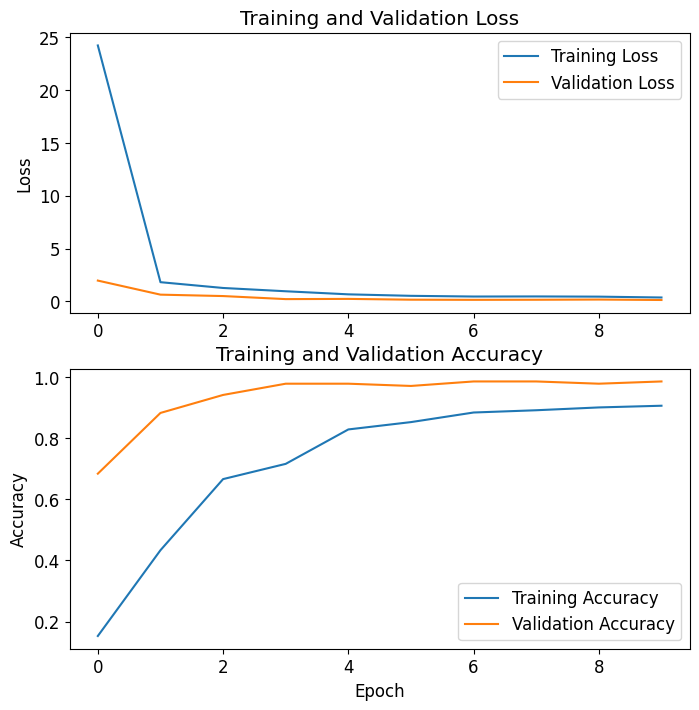

In [17]:

# Plot the training and validation loss and accuracy
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend(loc='upper right')
axs[0].set_ylabel('Loss')
axs[0].set_title('Training and Validation Loss')
axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('Accuracy')
axs[1].set_title('Training and Validation Accuracy')

plt.xlabel('Epoch')
plt.show()

In [18]:
model.save_weights('model_weights4.h5')

In [19]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

5/5 [==============================] - 36s 6s/step


In [20]:
report = classification_report(y_test, y_pred, output_dict=True)

table = PrettyTable()
table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]
for label, metrics in report.items():
    if label.isdigit():
        precision = round(metrics['precision'], 2)
        recall = round(metrics['recall'], 2)
        f1_score = round(metrics['f1-score'], 2)
        support = metrics['support']
        table.add_row([label_dict[int(label)], precision, recall, f1_score, support])

print(table)

+-------+-----------+--------+----------+---------+
| Class | Precision | Recall | F1-Score | Support |
+-------+-----------+--------+----------+---------+
|   a   |    1.0    |  1.0   |   1.0    |   3.0   |
|  bye  |    1.0    |  1.0   |   1.0    |   17.0  |
|  can  |    1.0    |  1.0   |   1.0    |   13.0  |
|  cat  |    1.0    |  1.0   |   1.0    |   10.0  |
|  demo |    0.86   |  1.0   |   0.92   |   12.0  |
|  dog  |    1.0    |  1.0   |   1.0    |   12.0  |
| hello |    1.0    |  0.82  |   0.9    |   11.0  |
|  here |    1.0    |  1.0   |   1.0    |   11.0  |
|   is  |    1.0    |  1.0   |   1.0    |   8.0   |
|  lips |    1.0    |  1.0   |   1.0    |   7.0   |
|   my  |    1.0    |  1.0   |   1.0    |   9.0   |
|  read |    1.0    |  1.0   |   1.0    |   8.0   |
|  you  |    1.0    |  1.0   |   1.0    |   15.0  |
+-------+-----------+--------+----------+---------+


In [21]:
print("Balanced accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced accuracy: 0.986013986013986


5/5 [==============================] - 33s 6s/step


c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


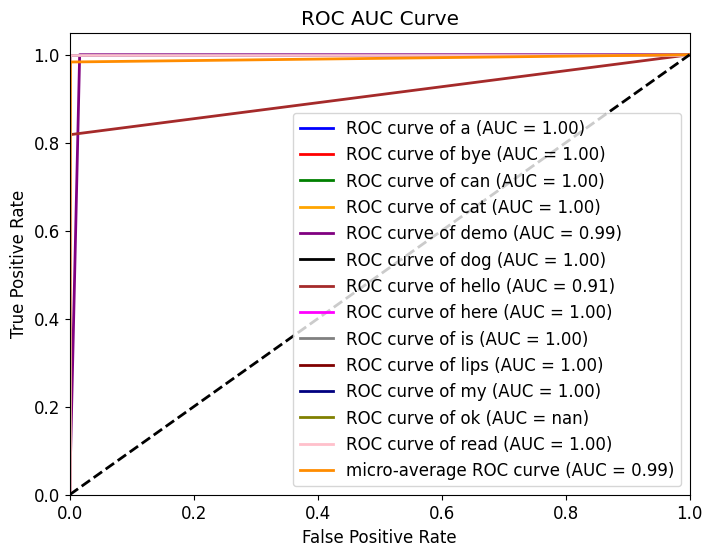

In [22]:
# Convert y_true and y_pred to one-hot encoding
n_classes = len(np.unique(y_test))
y_true_bin = label_binarize(y_test, classes=np.arange(n_classes))
y_pred_bin = model.predict(X_test)
y_pred_bin = label_binarize(np.argmax(y_pred_bin, axis=1), classes=np.arange(n_classes))

# Compute ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC AUC
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves
plt.figure(figsize=(8,6))
lw = 2
colors = ['blue', 'red', 'green', 'orange', 'purple', 'black', 'brown', 'magenta', 'gray', 'maroon', 'navy', 'olive', 'pink']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
             label='ROC curve of {0} (AUC = {1:0.2f})'
             ''.format(label_dict[i], roc_auc[i]))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=lw,
         label='micro-average ROC curve (AUC = {0:0.2f})'
         ''.format(roc_auc_micro))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()

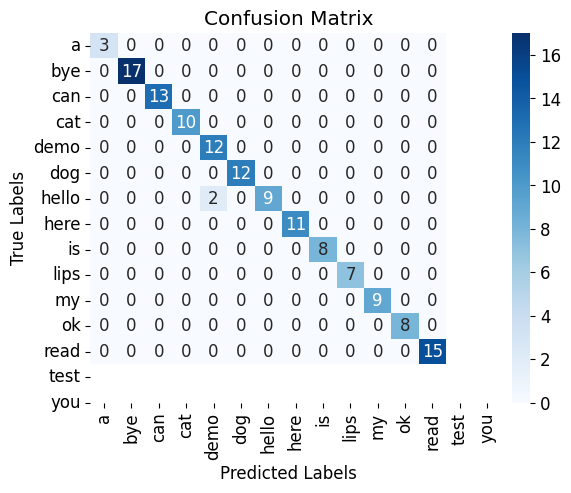

In [23]:

conf_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Define the list of label strings in the order of their integer values
label_strings = [label_dict[i] for i in range(len(label_dict))]

# Generate the heatmap confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", xticklabels=label_strings, yticklabels=label_strings)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()